# CIS 511 Final Project - Vishal Tejrao Patil

1. In the beginning, I have imported the libraries and the dataset(500 news articles).
2. Then I cleaned the  dataset by removing the stopwords, punctuation marks and lemmatized the words in the sentences of the        articles.
3. I have calculated the term frequencies and Inverse Document Frequency for the News article to extract top 10 Keywords.
4. Then I have implemented Luhn's Algorithm by calculating the weights of each sentence and sorting them in descending order.
5. Then I used top 3 weighted sentences to summarize the News article.
6. I collected the total sentences of the count in original article news and summarised into 40% of the original article.
   For e.g.:There are 10 sentences in an article. The summary would contain 40% = 4 sentences. 
7. Then, I ROUGE as my evaluation metric and compared the machine-generated summary with the news highlights provided in the    dataset.
8. Finally, I plotted a histogram of Frequency vs ROGUE-1 score

### Importing Libraries

In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from collections import Counter
import math
from rouge_score import rouge_scorer
from matplotlib import pyplot as plt

### Reading the Dataset


In [2]:
df = pd.read_csv('cnn.csv')
df = df[:500]

### Making a copy of dataframe

In [3]:
corpus = df.copy()

### Removing stopwords and punctuations and convert to lowercase

In [4]:

#creating a list of stopwords
stop_words = set(stopwords.words('english')) 


#tokenizing the text
for a in corpus['article']:
    tokens = word_tokenize(a)

#remove punctuation from each token
table = str.maketrans('', '', string.punctuation)
tokens = [w.translate(table) for w in tokens]

#filter out stop words
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]

#convert to lowercase
tokens = [word.lower() for word in tokens]

#Lemmatizing
lemmatizer = WordNetLemmatizer()        
for t in tokens:
    t = lemmatizer.lemmatize(t)

print(tokens)

['', 'cnn', '', '', 'ousted', 'tunisian', 'president', 'zine', 'el', 'abidine', 'ben', 'ali', 'sentenced', 'monday', '15', 'half', 'years', 'prison', 'charges', 'related', 'alleged', 'discovery', 'weapons', '', 'archaeological', 'artifacts', 'illegal', 'drugs', '', 'including', 'marijuana', '', 'country', 'presidential', 'palace', '', 'ben', 'ali', 'oneday', 'trial', 'sentencing', 'conducted', 'absentia', '', 'the', 'former', 'strongman', 'wife', '', 'leila', 'trabelsi', '', 'living', 'exile', 'saudi', 'arabia', 'since', 'january', 'revolt', 'ended', '23year', 'rule', 'touched', 'wave', 'uprisings', 'across', 'north', 'africa', 'middle', 'east', '', 'both', 'ben', 'ali', 'trabelsi', 'sentenced', 'last', 'month', '35', 'years', 'prison', 'corruption', 'charges', '', 'in', 'addition', 'prison', 'term', '', 'court', 'imposed', 'fine', '91', 'million', 'dinars', '', '', '65', 'million', '', '', 'ben', 'ali', 'members', 'inner', 'circle', 'also', 'facing', 'series', 'charges', 'relating', '

### Calculating Term Frequencies


In [5]:

freq = Counter(tokens)
print(freq)

Counter({'': 56, 'ben': 10, 'ali': 10, 'the': 5, 'charges': 4, 'former': 4, 'said': 4, 'tunisian': 3, 'prison': 3, 'trial': 3, 'since': 3, 'court': 3, 'beji': 3, 'people': 3, 'cnn': 2, 'sentenced': 2, 'monday': 2, 'years': 2, 'alleged': 2, 'country': 2, 'strongman': 2, 'trabelsi': 2, 'living': 2, 'saudi': 2, 'arabia': 2, 'revolt': 2, 'touched': 2, 'month': 2, 'corruption': 2, 'in': 2, 'million': 2, 'series': 2, 'scheduled': 2, 'courtroom': 2, 'one': 2, 'tunisia': 2, 'vendor': 2, 'political': 2, 'argued': 2, 'opponents': 2, 'ousted': 1, 'president': 1, 'zine': 1, 'el': 1, 'abidine': 1, '15': 1, 'half': 1, 'related': 1, 'discovery': 1, 'weapons': 1, 'archaeological': 1, 'artifacts': 1, 'illegal': 1, 'drugs': 1, 'including': 1, 'marijuana': 1, 'presidential': 1, 'palace': 1, 'oneday': 1, 'sentencing': 1, 'conducted': 1, 'absentia': 1, 'wife': 1, 'leila': 1, 'exile': 1, 'january': 1, 'ended': 1, '23year': 1, 'rule': 1, 'wave': 1, 'uprisings': 1, 'across': 1, 'north': 1, 'africa': 1, 'middl

### Calculating IDF

In [6]:
#counting the number of documents in the corpus and counting the number of documents that contain each token.

idf = {}
count = 0
for token in tokens:
    if token not in idf.keys():
        idf[token] = 1
        count +=1
    else:
        idf[token] +=1
for token in idf.keys():
    idf[token] = math.log(count/idf[token])

    print(idf)

{'': 1.3406243242867022, 'cnn': 2, 'ousted': 1, 'tunisian': 3, 'president': 1, 'zine': 1, 'el': 1, 'abidine': 1, 'ben': 10, 'ali': 10, 'sentenced': 2, 'monday': 2, '15': 1, 'half': 1, 'years': 2, 'prison': 3, 'charges': 4, 'related': 1, 'alleged': 2, 'discovery': 1, 'weapons': 1, 'archaeological': 1, 'artifacts': 1, 'illegal': 1, 'drugs': 1, 'including': 1, 'marijuana': 1, 'country': 2, 'presidential': 1, 'palace': 1, 'oneday': 1, 'trial': 3, 'sentencing': 1, 'conducted': 1, 'absentia': 1, 'the': 5, 'former': 4, 'strongman': 2, 'wife': 1, 'leila': 1, 'trabelsi': 2, 'living': 2, 'exile': 1, 'saudi': 2, 'arabia': 2, 'since': 3, 'january': 1, 'revolt': 2, 'ended': 1, '23year': 1, 'rule': 1, 'touched': 2, 'wave': 1, 'uprisings': 1, 'across': 1, 'north': 1, 'africa': 1, 'middle': 1, 'east': 1, 'both': 1, 'last': 1, 'month': 2, '35': 1, 'corruption': 2, 'in': 2, 'addition': 1, 'term': 1, 'court': 3, 'imposed': 1, 'fine': 1, '91': 1, 'million': 2, 'dinars': 1, '65': 1, 'members': 1, 'inner': 

### Calculating weights of each sentence in the article using Luhn Algorithm


In [7]:
#If the word is in the frequency dictionary, it adds the word's frequency multiplied by its IDF value to the weight variable.

def luhn(sentences):
    sentences_count = 0
    weights = []
    for sentence in sentences:
        sentences_count += 1
        word_list = word_tokenize(sentence)
        weight = 0
        
        for word in word_list:
            if word in freq.keys():
                weight += freq[word]*idf[word]
        weights.append(weight)
    return weights, sentences_count



### Getting the weights using Luhn Algorithm and Calculating ROGUE Score

In [8]:
#loop to go through each article
highlights = corpus['highlights']
f_list = []

for idx_highlights in range(len(corpus)):
    
    #determining the keywords for each article
    keywords = {}
    
    keywords = sorted(idf, key=idf.get, reverse=True)[:10]
    print("Keywords: {}\n".format(keywords))
    
    #summarizing the article using Luhn Algorithm
    sentences = corpus['article'][idx_highlights].split('.')
    weights, sentence_count = luhn(sentences)
    print("Total Sentences: ",sentence_count)
    summary = ""
    
    factor = sentence_count*0.4
    factor = int(factor) 
    
    print("Summary sentences:",factor)
    for i in range(factor):
        index = weights.index(max(weights))
        summary += sentences[index]+'.'
        weights[index] = 0
    
    print("\nSummary:\n {}\n".format(summary))
    
#     print("Highlights:\n {}\n".format(highlights[idx_highlights])) 

    
    
    scorer = rouge_scorer.RougeScorer(['rouge1'], use_stemmer=True)
    scores = scorer.score(summary, highlights[idx_highlights])
    
    for x in scores.values():
        x = x[2]
        f_list.append(x)        
    
    print("ROGUE:\n {}\n".format(scores))
    print("-------------------------------------------------------------------------------------------------------")
    

Keywords: ['ousted', 'president', 'zine', 'el', 'abidine', '15', 'half', 'related', 'discovery', 'weapons']

Total Sentences:  16
Summary sentences: 6

Summary:
  The bishop of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A virus in late September and early October. Bishop John Folda (pictured) of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A . State Immunization Program Manager Molly Howell says the risk is low, but officials feel it's important to alert people to the possible exposure. The diocese says he contracted the infection through contaminated food while attending a conference for newly ordained bishops in Italy last month. Fargo Catholic Diocese in North Dakota (pictured) is where the bishop is located . The state Health Department has issued an advisory of exposure for anyo

ROGUE:
 {'rouge1': Score(precision=0.7926829268292683, recall=0.08609271523178808, fmeasure=0.15531660692951016)}

-------------------------------------------------------------------------------------------------------
Keywords: ['ousted', 'president', 'zine', 'el', 'abidine', '15', 'half', 'related', 'discovery', 'weapons']

Total Sentences:  54
Summary sentences: 21

Summary:
  Mr Bannatyne said in a statement: 'My family is well protected, but I take any threat to them very seriously and will do all I can to ensure the person or people involved are caught. And although Mr Bannatyne later withdrew his threat, the entrepreneur said 'I'd gladly do my time' to get revenge on the anonymous tweeter.' Mr Bannatyne contacted the Durham Constabulary because his family have long been based in the North East. He responded by posting: 'I offer £25,000 reward for the capture of the coward who calls himself @YuriVasilyev_ Double if his arms are broken first'. But one user, speculating that Vasily


-------------------------------------------------------------------------------------------------------
Keywords: ['ousted', 'president', 'zine', 'el', 'abidine', '15', 'half', 'related', 'discovery', 'weapons']

Total Sentences:  22
Summary sentences: 8

Summary:
  They found a pool of blood in one of the buildings, Normand said, and when DNA results came back Monday evening showing the blood belonged to Ahlittia, investigators searched the area again. Investigators looked at the garbage can during their first search of the neighborhood, so they know the body was put inside sometime after Saturday -- but they still don't know when, he said.(CNN) -- Louisiana authorities said Tuesday they found the body of a missing 6-year-old girl, stabbed and stuffed in a trash can down the street from her home. That's when they found the girl's body in a garbage can, wrapped in a blanket from her house and covered in a garbage bag, Normand said. Witnesses told authorities that Ahlittia was a friend


-------------------------------------------------------------------------------------------------------
Keywords: ['ousted', 'president', 'zine', 'el', 'abidine', '15', 'half', 'related', 'discovery', 'weapons']

Total Sentences:  24
Summary sentences: 9

Summary:
  Over the following 70 or 80 million years, the rate of evolution accelerated by an order of magnitude (as defined in terms of the extinction and origination rate of species) and the diversity of life began to resemble that of today.' By cutting the rocks into extremely thin slicers, the scientists were able to shine a light through the fossils to see the formation inside, according to a report in LiveScience. 'This opens up a new door for us to shine some light on the timing and evolutionary steps that were taken by multicellular organisms that would eventually go on to dominate the Earth in a very visible way,' said Shuhai Xiao, a professor of geobiology in the Virginia Tech College of Science.Spherical fossils in China d

ROGUE:
 {'rouge1': Score(precision=0.8620689655172413, recall=0.029940119760479042, fmeasure=0.05787037037037037)}

-------------------------------------------------------------------------------------------------------
Keywords: ['ousted', 'president', 'zine', 'el', 'abidine', '15', 'half', 'related', 'discovery', 'weapons']

Total Sentences:  59
Summary sentences: 23

Summary:
  (We don't recommend doing this unless you're OK with someone putting cheesy words in your mouth like: "How cool! Banjo tells me we're close by, so let's connect!) If the whereabouts of your friends are less than thrilling ("Jesus Christ, who the F cares that you went to the bodega and bought dish soap?!"), you can toggle over to the "Explore" map or the "People" box to check out a graphical representation of people in your area. Well, you've got a friend in Banjo! Banjo serves two purposes: It alerts you when a friend is in your vicinity, and it gives you a glimpse into the lives of those around you -- and ar

Total Sentences:  22
Summary sentences: 8

Summary:
  The Bundesliga is just edging out the Premier League as the best in the world - according to the number of players left from each league in the World Cup. In terms of the most successful final for the English sides, a Brazil v Holland showpiece in the Maracana could see as many as 12 Premier League players on show - if the Dutch fielded both Krul and Swansea's Michel Vorm. England's top division had been storming ahead in these stakes but Germany's progression to the semi finals has helped put the Bundesliga on top heading into the last four. Bayern Munich are still the top club around - with a total of nine men helped by their six starters in the German side, but the likes of Chelsea and Manchester City are not far behind. Only 20 sides now have two or more players left in the World Cup, and the Premier League boasts four of those: Chelsea, Arsenal, Manchester City and Swansea. Tim Krul came off the bench to inspire Holland's penal

Summary sentences: 6

Summary:
  Leonard died moments after scoring the winning basket in overtime Thursday, securing a perfect season for the Fennville High School Blackhawks. Leonard scored his team's last four points in the 57-55 victory. "He was always respectful, he didn't run his mouth like most of the people would. Some piled off of school buses and hugged each other in the crisp winter air.(CNN) -- Hundreds filed by a casket on Sunday to say goodbye to a small-town hero who died shortly after scoring the winning shot to clinch an undefeated season for his Michigan high school basketball team. "He was just an all around great guy to play against," Craig Peterson, a player on the Bangor high school basketball team, told CNN affiliate WZZM.

ROGUE:
 {'rouge1': Score(precision=0.7142857142857143, recall=0.1968503937007874, fmeasure=0.30864197530864196)}

-------------------------------------------------------------------------------------------------------
Keywords: ['ousted', 'pre

Total Sentences:  39
Summary sentences: 15

Summary:
  Ms Burgass said the pavement has been in the same condition since she moved in 15 years ago . Martin Parker, 52, secretary of The Villas Residents' Association, said: 'The letter said one postman had injured themselves a month ago, and we were told it happened again a couple of days before the letter was sent. 'Royal Mail deliver to the likes of the Isle of Skye and the Hebrides - we're just The Villas, in Stoke. 'The pavement has been in the same condition since I moved in 15 years ago. Yesterday home-owners on the road, which is not council-maintained as it is privately run by the residents' association, said their mail had been delivered without a problem for 150 years and slammed Royal Mail for not giving them any warning. 'It's a massive inconvenience for all the residents, especially the more elderly people living here. Resident Catherine Burgass said the move by Royal Mail has 'annoyed' all of the residents at The Villas . '

Summary sentences: 10

Summary:
  But four minutes later Haskell went over again thanks to Delon Armitage's interception, and then Jonny Wilkinson kicked his third penalty, this one from the halfway line to give the flyhalf 15 points for the match." England flanker James Haskell scored two tries to lift the pressure on head coach Martin Johnson, as Wales paid the price for Alun-Wyn Jones' sin-binning with 17 points conceded while the lock was off the field at Twickenham. We showed an ability in the first half to turn defense into attack and the amount of lineout ball we won was a big plus.(CNN) -- Ireland opened the defense of their Six Nations rugby title with a 29-11 victory at home to Italy, while England repelled the challenge of Wales to win 30-17 in Saturday's other match. Recalled flyhalf Ronan O'Gara became the first player to score 500 points in the tournament as he was successful with all six kicks at goal, while Jamie Heaslip and Tomas O'Leary crossed for first-half tries. I


-------------------------------------------------------------------------------------------------------
Keywords: ['ousted', 'president', 'zine', 'el', 'abidine', '15', 'half', 'related', 'discovery', 'weapons']

Total Sentences:  27
Summary sentences: 10

Summary:
  Sweden veteran Henrik Larsson had shot over the bar and Johan Elmander, who scored against Spain in a qualifying match for Euro 2008, missed two chances before Fredrik Stoor curled a pass from the right to Ibrahimovic in the area in the 34th minute. Villa was in the team despite sustaining a hairline fracture of his right index finger while celebrating the first of his hat-trick goals against Russia, and the Sweden defense kept him under wraps until the 38th minute, when Isaksson had to stop a low shot. However, a long ball out of defense dropped kindly for Villa and the striker slipped the ball to the left of goalkeeper Andreas Isaksson for his fourth goal of the tournament. Sweden's attack sorely lacked the physical pre


-------------------------------------------------------------------------------------------------------
Keywords: ['ousted', 'president', 'zine', 'el', 'abidine', '15', 'half', 'related', 'discovery', 'weapons']

Total Sentences:  50
Summary sentences: 20

Summary:
  A teenager who wanted to help grieving relatives cope with the loss of loved ones has become one of the youngest funeral directors in Britain. 'At the end of the day, we’re dealing with someone’s loved one. She said: 'People try to hide death from children, but I was exposed to it - I went to see her in the Chapel of Rest. One of the country's youngest undertakers, she said her career choice surprised some. Clad in top hat, cravat and tail coats, Miss Darlow conducted her first funeral in June last year and has completed another nine since then. Now she is completing a training course at the parlour, alongside a funeral services foundation degree and an embalming course at the University of Bath.' Another nail in the coff


-------------------------------------------------------------------------------------------------------
Keywords: ['ousted', 'president', 'zine', 'el', 'abidine', '15', 'half', 'related', 'discovery', 'weapons']

Total Sentences:  41
Summary sentences: 16

Summary:
  But the situation in the park is "not in the best interests of the protesters, residents or the city," he said. The cleaning is to be done in stages, and protesters will be allowed to return to the park as areas are cleaned if they obey the rules set forth by the owners, Brookfield Properties, the statement said." "The mayor is a strong believer in the First Amendment and believes that the protesters have a right to continue to protest," Deputy Mayor for Operations Cas Holloway said in a written statement. Crowds have taken up residence in the park in New York's financial district, and organizers have called for 20,000 people to flood the area for a "few months. For almost a month, demonstrations have addressed such issue

Total Sentences:  63
Summary sentences: 25

Summary:
  'The incident commander was notified by one of the chiefs on the field that it appeared that there was a possibility that one of the deceased had been hit by one of the fire vehicles,' Mindy Talmadge, a spokeswoman for the San Francisco Fire Department, said yesterday in an interview with Bloomberg. None of the flight attendants could be found directing the 291 injured and terrified passengers off the stricken Boeing 777, no one from the cockpit announced anything - and now previously unseen pictures taken by Levy in the confused aftermath have been released by the Associated Press. Ignoring his pain, Levy, 39, rushed to the escape door by his seat above one of the battered wings and opened it and he began to direct the evacuation of the aircraft which just moments before had crash landed - losing its entire tail section. Indeed, the tour organizer, Adam Yu believes that the entire camp will be scrapped and the children will return

Summary sentences: 18

Summary:
  "While this is a good technical success, the harsh reality is that in Yemen, al Qaeda in the Arabian Peninsula is growing, getting more powerful, recruiting more assets and taking advantage of the fact that Yemen is essentially the Humpty Dumpty of the Arabian Peninsula -- it's falling apart, broken," said Riedel, now a senior fellow at the Brookings Institution. It's unclear how much of the credit should go to the United States or to Saudi Arabia, for whom sources say the mole was working, but both countries have delivered a practical and psychological setback to al Qaeda in the Arabian Peninsula, analysts on the region said." Of the al Qaeda affiliate groups trying to carry out terrorist operations today, al Qaeda in the Arabian Peninsula is the closest version to the network Osama bin Laden led, Soufan said. Bruce Riedel, who spent 30 years in the CIA and was a senior adviser on the Middle East to four presidents, said thwarting the bomb plot is "pr

ROGUE:
 {'rouge1': Score(precision=0.7, recall=0.029453015427769985, fmeasure=0.05652759084791386)}

-------------------------------------------------------------------------------------------------------
Keywords: ['ousted', 'president', 'zine', 'el', 'abidine', '15', 'half', 'related', 'discovery', 'weapons']

Total Sentences:  71
Summary sentences: 28

Summary:
  Stressing the key role that those working at airports play in keeping Ebola in check, the CDC spokesman said: "Being educated, knowing the symptoms, recognizing what to do, having a response to protocol, knowing who to call -- those are really, really important parts of the global containment strategies to deal with threats like this. The virus is named after the Ebola River in the Democratic Republic of Congo (formerly Zaire), where one of the first outbreaks occurred in 1976." On the same day, the Peace Corps said it was temporarily removing its 340 volunteers from Liberia, Sierra Leone and Guinea due to the outbreak. The


-------------------------------------------------------------------------------------------------------
Keywords: ['ousted', 'president', 'zine', 'el', 'abidine', '15', 'half', 'related', 'discovery', 'weapons']

Total Sentences:  15
Summary sentences: 6

Summary:
 ISIS militants are fighting Iraqi military and tribal forces close to the main government complex of Anbar province in the center of Ramadi, according to a local official there. "If the government complex falls, it would mean the fall of the whole province," Al-Issawi told CNN. Most of the Sunni-dominated province and some parts of Ramadi have been under the control of ISIS, and the militants have been making recent advances despite coalition airstrikes targeting them. The fighting started Friday after ISIS militants launched a coordinated assault from different direction around the city, according to Faleh al-Issawi, deputy head of the provincial council. The battle is taking place about 1,000 feet from the complex that ho

ROGUE:
 {'rouge1': Score(precision=0.5, recall=0.04439252336448598, fmeasure=0.0815450643776824)}

-------------------------------------------------------------------------------------------------------
Keywords: ['ousted', 'president', 'zine', 'el', 'abidine', '15', 'half', 'related', 'discovery', 'weapons']

Total Sentences:  51
Summary sentences: 20

Summary:
 " Another Obama spokesman, Jay Carney, earlier said the president "will not sign a bill that extends those tax rates for the top 2%," as the GOP proposal would do. So what happens next? Senior Obama administration officials said Monday the GOP's plan was a nonstarter, primarily because they said it would actually lower tax rates for those in the top 2% income bracket and was too short on specifics. They have said an agreement must include major reforms of entitlement programs such as the Medicare and Medicaid government-run health-care programs for senior citizens, the disabled and the poor. The end of that crisis was a tempor

Total Sentences:  38
Summary sentences: 15

Summary:
  The libertarian movement went on to gain sizable influence in the state's Republican Party after the election -- Spiker, for example, became state GOP chairman -- but mainstream Republicans took back control of the party earlier this year. Then, he'll quickly hop across the state line to help the Iowa GOP open an office in Council Bluffs, where he's expected to appear with the state's GOP Senate nominee, Joni Ernst. Paul to hear the concerns of average Iowans as well as job creators," said Steve Grubbs, Paul's chief Iowa strategist and a longtime political operative in the Hawkeye State. Tim Hagle, a political science professor at the University of Iowa, said the senator's plan isn't a bad idea, especially in a midterm election year. Paul will leave the state on Wednesday, a day before the start of the Iowa State Fair, a popular venue for presidential hopefuls. "If you're at the state fair, the attention is on you and not the perso


-------------------------------------------------------------------------------------------------------
Keywords: ['ousted', 'president', 'zine', 'el', 'abidine', '15', 'half', 'related', 'discovery', 'weapons']

Total Sentences:  16
Summary sentences: 6

Summary:
  She says the costs for the dress and materials was under $30 and that included the fabric for the lining. She posted an 11 second YouTube video showing the creation of the dress from the beginning stages . To add to the good luck she says she plans on wearing it wearing it again with linings of different colours and with the train bustled up in different ways. The bride used her commute to make the dress and she says the time 'couldn't be used for anything else anyway'. The talented seamstress posted a video on YouTube about the dress under the name Alkikatt and also on Reddit. It took the bride five months to make the beautiful dress on her morning commute to work .

ROGUE:
 {'rouge1': Score(precision=0.43859649122807015,

Total Sentences:  77
Summary sentences: 30

Summary:
  Even liberals in the state, like Caren Robinson, who started the first women's shelter in Juneau, praise the fact that he has supported addressing domestic violence and rape since the 1990s as a member of the legislature." Like an alcoholic must admit he has a problem in order to face it, he told me, the governor of the state with the highest rape rate must, too, fess up to the problem in order to solve it. â€¢ In one small town in southwest Alaska, I met young people who are learning about the Yupik Eskimo culture in after-school programs at the Tundra Women's Coalition, which receives funding from the state. The state promotes a series of "Choose Respect" marches, which were organized in more than 140 communities across the state last year and will be held again in the spring." Those "real-deal heroes" should include people like Sarah Palin, the woman still more associated with the governorship in the American public's mind than 

Total Sentences:  59
Summary sentences: 23

Summary:
  According to court documents, Polanski, his lawyer and the prosecutor thought they'd worked out a deal that would spare Polanski from prison and let the young victim avoid a public trial. But the original judge in the case, who is now dead, first sent the director to maximum-security prison for 42 days while he underwent psychological testing." Polanski's lawyers tried earlier this year to have the charges thrown out, but a Los Angeles judge rejected the request." Gibbons said the extradition process will be determined in Switzerland, but said authorities are ready to move forward with Polanski's sentencing process, depending on what happens in Zurich. Following Espinoza's ruling earlier this year, Geimer's lawyer, Larry Silver, said he was disappointed and that Espinoza "did not get to the merits and consider the clear proof of both judicial and prosecutorial corruption. There have been repeated attempts to settle the case over th

Total Sentences:  79
Summary sentences: 31

Summary:
  A suit against the Dallas hospital faced long odds due to the state's regulations on malpractice suits that have made it one of the hardest places in the United States to sue over medical errors, especially those that occur in the emergency room, according to plaintiffs' lawyers and legal experts. Duncan's sister, Mai Wureh, said that the hospital had satisfied her request for the remainder of her brother's medical records, including lab results of his treatment with the experimental drug brincidofovir. America invented the Ebola virus to 'kill Africans' and deliberately left victim Duncan to die 'like a dog' in revenge for bringing the disease into the U. Grieving Mary Pearson claimed that the deadly virus was created as part of an experiment to infect black people on the continent - echoing the views of a race-hate preacher who says Ebola was invented to 'depopulate' Africa. Texas Health Presbyterian Hospital Dallas confirmed the

Total Sentences:  41
Summary sentences: 16

Summary:
  A spokesman for the Oak Brook police department, George Peterson, said the arrested protesters were being processed and would be released, with court dates being assigned later. While turnout for the protests has varied, they've nevertheless struck a chord at a time when the gap between the country's rich and poor has widened. Among them was Mary Kay Henry, president of the Service Employees International Union, who said in a statement released after her arrest that she wanted McDonald's workers to know her union members stood with them. But most fast-food workers are given far less time on the clock, in part because restaurant owners want to avoid paying overtime and limit the number of employees who receive benefits, if they are offered. The SEIU has been providing financial and organizational support to the fast-food protests, which began in late 2012 in New York City and have been spreading to other cities and countries. Organi


-------------------------------------------------------------------------------------------------------
Keywords: ['ousted', 'president', 'zine', 'el', 'abidine', '15', 'half', 'related', 'discovery', 'weapons']

Total Sentences:  84
Summary sentences: 33

Summary:
 (CNN) -- Rough seas are delaying the connection of the vessel Helix Producer to the ruptured oil well in the Gulf of Mexico, a spokesman at the oil cleanup command center in Louisiana said Wednesday. "The intention is to intercept the well bore, well down below the surface near the reservoir, then pump heavy mud in to counteract the pressure of the oil coming up," Allen said. In early June, during an exclusive 48-hour embed with Allen, CNN's Kyra Phillips visited the site of the oil disaster and gained access to the Development Driller III -- the rig that is drilling the primary relief well some 16,000 to 18,000 feet below the sea floor." Also, a massive airship, or blimp, and a sea vessel that can suck oil out of the rupt

In [9]:
#Evaluating average ROUGE-1 Score
avg_rg = sum(f_list)/len(f_list)
avg_rg

0.19734104885691328

### Plotting a histogram

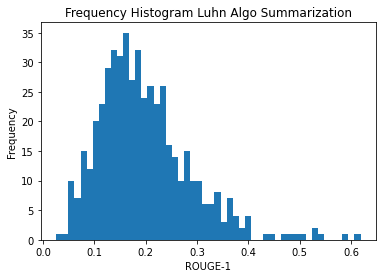

In [10]:
# Plot Histogram on x
plt.hist(f_list, bins=50)
plt.gca().set(title='Frequency Histogram Luhn Algo Summarization', ylabel='Frequency',xlabel='ROUGE-1');
